In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat

data= "Data/24-08-30-19-15.txt"
data = pd.read_csv(data, sep=" ")


data2= "Data/24-08-29-19-54.txt"
data2= pd.read_csv(data2, sep=" ")

print(data)

        40000  1725063341
0       40000  1725063342
1       40007  1725063343
2       40006  1725063344
3       40010  1725063345
4       40009  1725063346
...       ...         ...
248025  40002  1725304274
248026  40009  1725304275
248027  40000  1725304276
248028  40000  1725304277
248029  40000  1725304278

[248030 rows x 2 columns]


In [79]:
Decay_times=data.iloc[:,0]
Decay_times2=data2.iloc[:,0]

In [80]:
Decay_times

0         40000
1         40007
2         40006
3         40010
4         40009
          ...  
248025    40002
248026    40009
248027    40000
248028    40000
248029    40000
Name: 40000, Length: 248030, dtype: int64

In [81]:
Decay_times=np.sort(Decay_times)
Decay_times2=np.sort(Decay_times2)

In [85]:
Decay_times

array([   40,    40,    40, ..., 40022, 40023, 40023], dtype=int64)

In [86]:
filter_i=0
for i in range(len(Decay_times)):
    
    if  Decay_times[i]>= 40000:
        
        filter_i=i
        
        break
        

print(filter_i)


filter_i2=0
for i2 in range(len(Decay_times2)):
    
    if  Decay_times2[i2]>= 40000:
        
        filter_i2=i2
        
        break
        

print(filter_i2)

7171
2056


In [87]:
Decay_Filtered=Decay_times[0:filter_i-1] /1000
Decay_Filtered2=Decay_times2[0:filter_i2-1] /1000

print(Decay_Filtered)

[ 0.04  0.04  0.04 ... 19.76 19.8  19.94]


In [88]:
N_muons=(len(Decay_Filtered))
N_muons

N_muons2=(len(Decay_Filtered2))
N_muons2

2055

In [136]:
hist, bin_edges = np.histogram(Decay_Filtered,bins=25)
hist2, bin_edges2 = np.histogram(Decay_Filtered2,bins=25)

In [90]:
hist,bin_edges

(array([2274, 1483, 1049,  706,  507,  329,  215,  167,  103,   77,   52,
          31,   33,   27,   23,   15,   18,   13,    6,    7,    4,    8,
           6,    8,    9], dtype=int64),
 array([ 0.04 ,  0.836,  1.632,  2.428,  3.224,  4.02 ,  4.816,  5.612,
         6.408,  7.204,  8.   ,  8.796,  9.592, 10.388, 11.184, 11.98 ,
        12.776, 13.572, 14.368, 15.164, 15.96 , 16.756, 17.552, 18.348,
        19.144, 19.94 ]))

In [91]:
Decay_Filter_pd=pd.DataFrame(Decay_Filtered)

2.3226287308228737

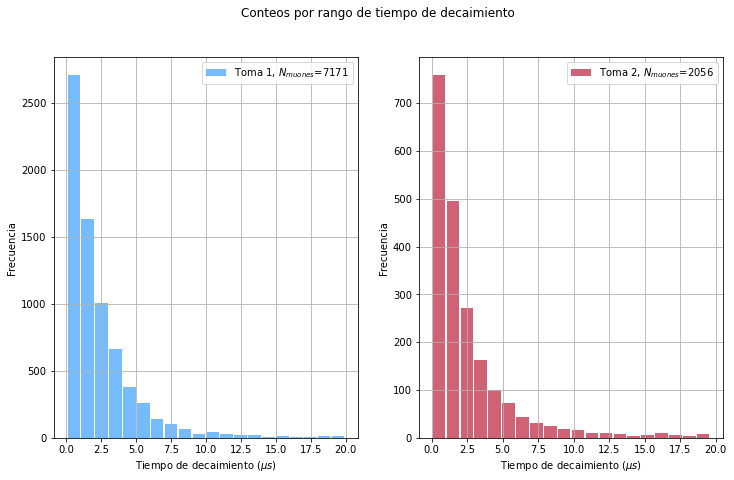

In [361]:
Muon_counts=[Decay_Filtered,Decay_Filtered2]

fig, (ax1,ax2) =plt.subplots(1,2,figsize=(12,7))
ax1.hist(Decay_Filtered, bins=20,fill=True,rwidth=0.9,label="Toma 1, $N_{muones}$=7171",color="xkcd:sky blue")
ax1.legend()
ax1.set_xlabel("Tiempo de decaimiento ($\mu s$)")
ax1.set_ylabel("Frecuencia")
ax1.grid()


ax2.hist(Decay_Filtered2, bins=20,fill=True,rwidth=0.9,label="Toma 2, $N_{muones}$=2056",color="xkcd:rose")
ax2.legend()
ax2.set_xlabel("Tiempo de decaimiento ($\mu s$)")
ax2.set_ylabel("Frecuencia")
ax2.grid()

plt.suptitle("Conteos por rango de tiempo de decaimiento")

plt.savefig("Histograma.pdf",format="pdf")

bin_pos=[]
for i in range(1,len(bin_edges)):
       bin_pos.append((bin_edges[i]+bin_edges[i-1])/2) 
        
mean=np.sum(hist*bin_pos)/N_muons
mean





In [138]:
N_t=N_muons-np.cumsum(hist)
N_t=np.append(N_muons,N_t)
N_t
bin_edges[0]=0


N_t2=N_muons2-np.cumsum(hist2)
N_t2=np.append(N_muons2,N_t2)
N_t2
bin_edges2[0]=0




C:\Users\THINKB~1\AppData\Local\Temp/ipykernel_17676/4270683790.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*X)+D
C:\Users\THINKB~1\AppData\Local\Temp/ipykernel_17676/4270683790.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*X)+D


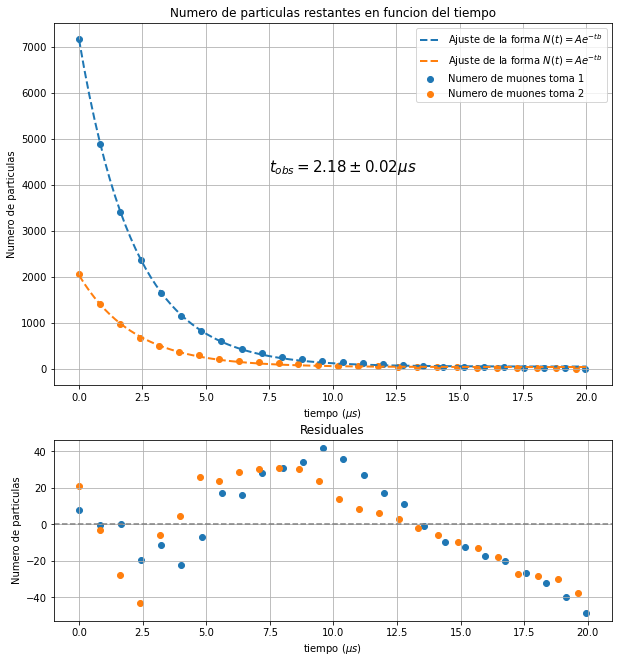

In [360]:
def fit_exp(X,a,b,D):
    return a*np.exp(-b*X)+D


fig2,(ax3,ax4)=plt.subplots(2,1,figsize=(10,11),gridspec_kw={'height_ratios': [2, 1]})

popt, pcov = curve_fit(fit_exp,bin_edges,N_t,maxfev=1000)
x=np.linspace(0,20,100)
ax3.plot(x, fit_exp(x,*popt), linewidth=2, label="Ajuste de la forma $N(t)=Ae^{-tb}$",ls="--")
ax3.scatter(bin_edges,N_t,label="Numero de muones toma 1")

popt2, pcov2 = curve_fit(fit_exp,bin_edges2,N_t2,maxfev=1000)
x=np.linspace(0,20,100)
ax3.plot(x, fit_exp(x,*popt2), linewidth=2, label="Ajuste de la forma $N(t)=Ae^{-tb}$",ls="--")
ax3.scatter(bin_edges2,N_t2,label="Numero de muones toma 2")
ax3.text(x=7.5, y=4300 ,s="$t_{obs}=2.18 \pm 0.02 \mu s$" ,size=15)

Residuals1=N_t-fit_exp(bin_edges,*popt)
ax4.scatter(bin_edges,Residuals1)

Residuals2=N_t2-fit_exp(bin_edges2,*popt2)
ax4.scatter(bin_edges2,Residuals2)

ax4.axhline(y=0,ls="--",c="gray")

ax3.set_title("Numero de particulas restantes en funcion del tiempo")
ax4.set_title("Residuales")

ax3.set_xlabel("tiempo ($\mu s$)")
ax4.set_xlabel("tiempo ($\mu s$)")


ax3.set_ylabel("Numero de particulas")
ax4.set_ylabel("Numero de particulas")
ax3.grid()
ax4.grid()
ax3.legend()


plt.savefig("MuonDecay.pdf",format="pdf")



In [349]:
popt
b1=ufloat(popt[1],np.sqrt(pcov[1,1]))
b2=ufloat(popt2[1],np.sqrt(pcov2[1,1]))



In [345]:
np.sqrt(pcov[1,1])

0.0028740781876128237

In [350]:
t_obs1=1/b1
t_obs2=1/b2
print(t_obs1,t_obs2)

2.180+/-0.014 2.18+/-0.05


In [351]:
print(np.mean([t_obs1,t_obs2]))

2.181+/-0.024


In [352]:
popt,popt2

(array([7.11449832e+03, 4.58689118e-01, 4.76706137e+01]),
 array([1.99630742e+03, 4.58119394e-01, 3.76334081e+01]))

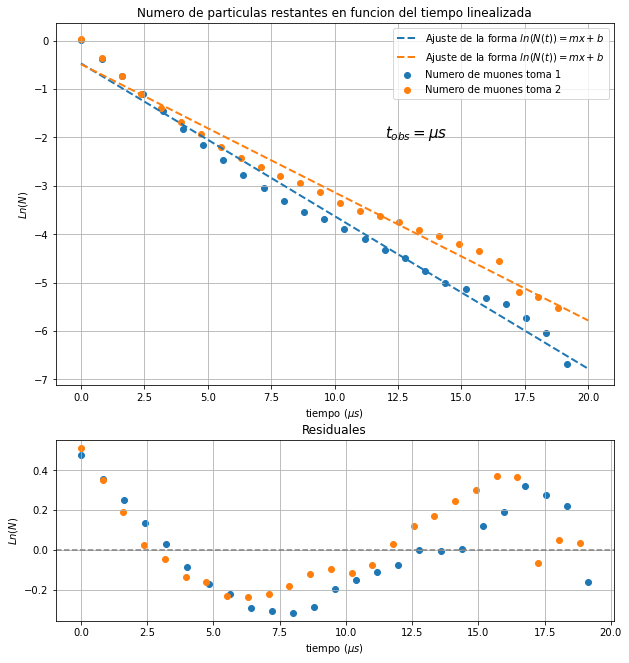

In [362]:
def fit_lin(X,m,c):
    return m*X+c


lin1=np.log(N_t[:-1]/popt[0])
lin2=np.log(N_t2[:-1]/popt2[0])
fig3,(ax5,ax6)=plt.subplots(2,1,figsize=(10,11),gridspec_kw={'height_ratios': [2, 1]})

poptl, pcovl = curve_fit(fit_lin,bin_edges[:-1],lin1,maxfev=2000)
x=np.linspace(0,20,100)
ax5.plot(x, fit_lin(x,*poptl), linewidth=2, label="Ajuste de la forma $ln(N(t))=mx+b$",ls="--")
ax5.scatter(bin_edges[:-1],lin1,label="Numero de muones toma 1")

popt2l, pcov2l = curve_fit(fit_lin,bin_edges2[:-1],lin2,maxfev=1000)
x=np.linspace(0,20,100)
ax5.plot(x, fit_lin(x,*popt2l), linewidth=2, label="Ajuste de la forma $ln(N(t))=mx+b$",ls="--")
ax5.scatter(bin_edges2[:-1],lin2,label="Numero de muones toma 2")
ax5.text(x=12, y=-2 ,s="$t_{obs}= \mu s$" ,size=15)

Residuals1l=lin1-fit_lin(bin_edges[:-1],*poptl)
ax6.scatter(bin_edges[:-1],Residuals1l)

Residuals2l=lin2-fit_lin(bin_edges[:-1],*popt2l)
ax6.scatter(bin_edges2[:-1],Residuals2l)
ax6.axhline(y=0,ls="--",c="gray")

ax5.set_title("Numero de particulas restantes en funcion del tiempo linealizada")
ax6.set_title("Residuales")

ax5.set_xlabel("tiempo ($\mu s$)")
ax6.set_xlabel("tiempo ($\mu s$)")


ax5.set_ylabel("$Ln(N)$")
ax6.set_ylabel("$Ln(N)$")
ax5.grid()
ax6.grid()
ax5.legend()



plt.savefig("MuonDecayLinear.pdf",format="pdf")



In [359]:
b1l=ufloat(poptl[0],np.sqrt(pcovl[0,0]))
b2l=ufloat(popt2l[0],np.sqrt(pcov2l[0,0]))
t_obs1l=1/b1l
t_obs2l=1/b2l
print(t_obs1l,t_obs2l)


-3.17+/-0.08 -3.78+/-0.11


In [355]:
poptl

array([-0.31558852, -0.46885849])